In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import optimize
%matplotlib inline

In [2]:
data = scipy.io.loadmat('data/ex5data1.mat')

In [3]:
X = np.array(data['X'])
Xtest = np.array(data['Xtest'])
Xval = np.array(data['Xval'])
y = np.array(data['y'])
ytest = np.array(data['ytest'])
yval = np.array(data['yval'])

In [4]:
len(X) == len(y) and len(Xtest) == len(ytest) and len(Xval) == len(yval)

True

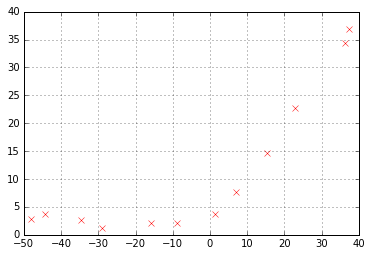

In [5]:
plt.plot(X,y,'rx')
plt.grid(True)

In [6]:
def linearRegCostFunction(X, y, theta, Lambda):
    theta = np.c_[theta]
    H = np.dot(X, theta)
    T = (H - y) ** 2
    J = np.sum(T) / 2 / len(y) + Lambda / 2 / len(y) * np.sum(theta ** 2)
    
    theta[0] = [0]
    grad = X.T.dot(H - y) / len(y) + Lambda / len(y) * theta
    
    return J
linearRegCostFunction(np.column_stack((np.ones(X.shape[0]), X)), y, np.c_[np.ones(X.shape[1] + 1)], 1)

303.95152555359761

In [7]:
def trainLinearReg(X, y, Lambda):
    initial_theta = np.c_[np.zeros(X.shape[1])]
    costFunction = lambda t : linearRegCostFunction(X, y, t, Lambda)
    options = {'full_output': True, 'maxiter': 5000}
    theta,_, _, _, _ = optimize.fmin(costFunction, initial_theta, **options)
    return theta
theta = trainLinearReg(np.column_stack((np.ones(X.shape[0]), X)), y, 0)
theta

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 79
         Function evaluations: 152


array([ 13.08787505,   0.36777935])

(array([ -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 10 Text yticklabel objects>)

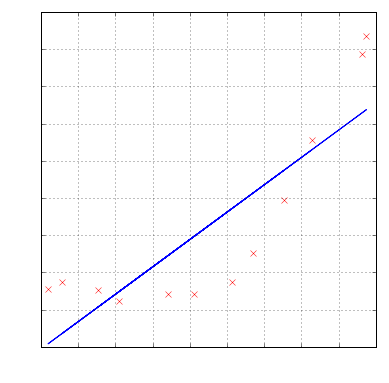

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(X,y,'rx')
plt.plot(X, np.column_stack((np.ones(X.shape[0]), X)).dot(theta))
plt.xlabel('X', color='w')
plt.ylabel('y', color='w')
plt.grid(True)
plt.xticks(color='w')
plt.yticks(color='w')

In [9]:
def learningCurve(X, y, Xval, yval, Lambda):
    theta = np.array([])
    error_train = []
    error_val = []
    for i in range(len(y)):
        theta = trainLinearReg(np.column_stack((np.ones(i+1), X[:i+1])), y[:i+1], Lambda)
        error_train.append(linearRegCostFunction(np.column_stack((np.ones(i+1), X[:i+1])), y[:i + 1], theta, 0 ))
        error_val.append(linearRegCostFunction(np.column_stack((np.ones(Xval.shape[0]), Xval)), yval, theta, 0 ))
    return error_train, error_val
error_train, error_val = learningCurve(np.column_stack((np.ones(X.shape[0]), X)), y, np.column_stack((np.ones(Xval.shape[0]), Xval)), yval, 0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 88
Optimization terminated successfully.
         Current function value: 0.416948
         Iterations: 41
         Function evaluations: 79
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 162
         Function evaluations: 302
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 126
         Function evaluations: 226
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 135
         Function evaluations: 254
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 161
         Function evaluations: 297
Optimization terminated successfully.
         Current function value: 20.098522
         Iterations: 132
         Function evaluations: 241
Optimization terminat

(array([   0.,   50.,  100.,  150.,  200.,  250.]),
 <a list of 6 Text yticklabel objects>)

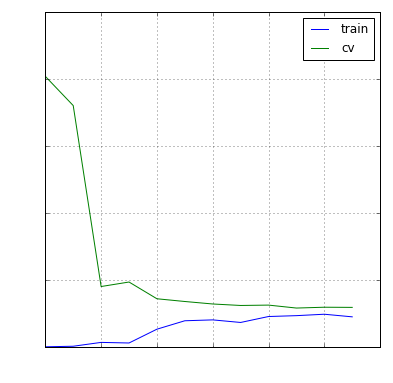

In [10]:
plt.figure(figsize=(6, 6))
plt.plot(range(len(y)), error_train, label='train')
plt.plot(range(len(y)), error_val, label='cv')
plt.xlabel('X', color='w')
plt.ylabel('y', color='w')
plt.grid(True)
plt.legend(loc=0)
plt.xticks(color='w')
plt.yticks(color='w')

In [11]:
p = 8

In [12]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:,i] = (X ** (i + 1)).T[0]
    return X_poly
X_poly = polyFeatures(X, p)

In [13]:
def featureNormalize(X_poly):
    mean = np.c_[X_poly.mean(axis=0)]
    sigma = np.c_[X_poly.std(axis=0)]
    return (X_poly - mean.T) / sigma.T, mean.T, sigma.T
X_poly, mean, sigma = featureNormalize(X_poly)
X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))

In [14]:
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mean) / sigma
X_poly_test = np.column_stack((np.ones(X_poly_test.shape[0]), X_poly_test))

In [15]:
X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mean) / sigma
X_poly_val = np.column_stack((np.ones(X_poly_val.shape[0]), X_poly_val))

In [16]:
theta = trainLinearReg(X_poly, y, 0)

In [17]:
sigma

array([[  2.86887308e+01,   7.54346385e+02,   4.61380464e+04,
          1.66104441e+06,   8.99399404e+07,   3.68940106e+09,
          1.89508052e+11,   8.31905350e+12]])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 231
         Function evaluations: 366
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 392
         Function evaluations: 604
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 811
         Function evaluations: 1215
Optimization terminated successfully.
         Current function value: 0.265767
         Iterations: 913
         Function evaluations: 1342
Optimization terminated successfully.
         Current function value: 1.199797
         Iterations: 1382
         Function evaluations: 1999
Optimization terminated successfully.
         Current function value: 1.435993
         Iterations: 1119
         Function evaluations: 1632
Optimization terminated successfully.
         Current function value: 2.316888
         Iterations: 1190
         Function evaluations: 1724
Optimization

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 7 Text yticklabel objects>)

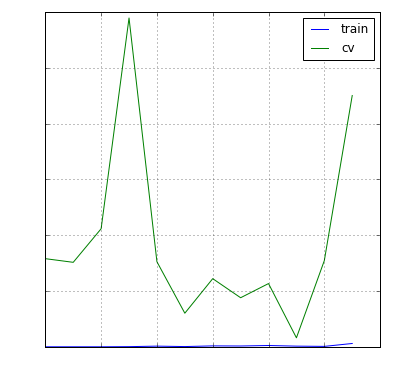

In [19]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, 0)
plt.figure(figsize=(6, 6))
plt.plot(range(len(y)), error_train, label='train')
plt.plot(range(len(y)), error_val, label='cv')
plt.xlabel('X', color='w')
plt.ylabel('y', color='w')
plt.grid(True)
plt.legend(loc=0)
plt.xticks(color='w')
plt.yticks(color='w')

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 9 Text yticklabel objects>)

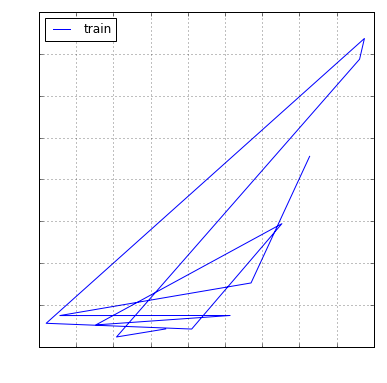

In [20]:
plt.figure(figsize=(6, 6))
plt.plot(X, y, label='train')
plt.xlabel('X', color='w')
plt.ylabel('y', color='w')
plt.grid(True)
plt.legend(loc=0)
plt.xticks(color='w')
plt.yticks(color='w')